In [1]:
%load_ext autoreload
%autoreload 2

from data import make_pinwheel_data
from models import resVAE, VAE
from plot.plot import plot_loss

In [2]:
hyperparameters = {
    "VAE_parameters": {"latent_dim": 2, "input_size": 2, "hidden_size": 50,},
    "VAE_train_parameters": {"epochs": 100, "batch_size": 32,},
    "pinwheel_data_parameters": {
        "radial_std": 0.3,
        "tangential_std": 0.05,
        "num_classes": 5,
        "num_per_class": 100,
        "rate": 0.25,
    },
}

In [3]:
# generate synthetic data
data = make_pinwheel_data(**hyperparameters["pinwheel_data_parameters"])

100%|██████████| 100/100 [00:02<00:00, 40.75it/s]


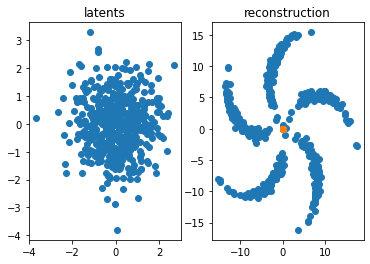

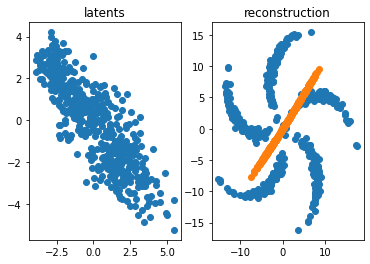

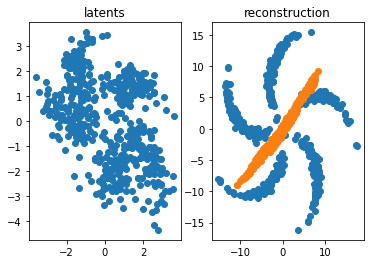

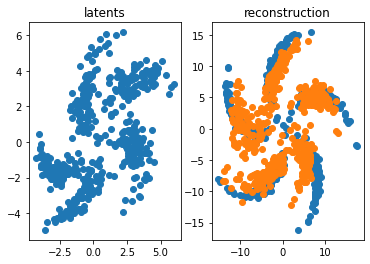

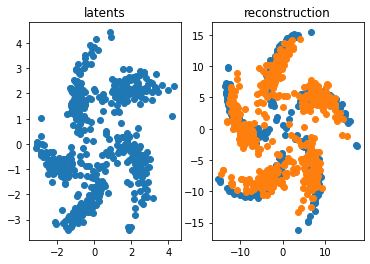

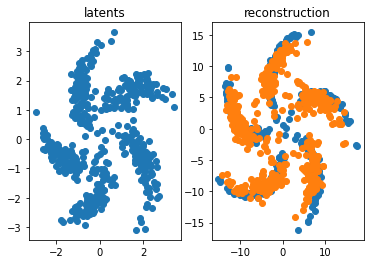

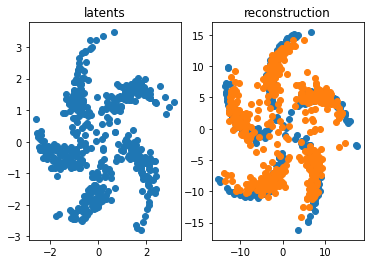

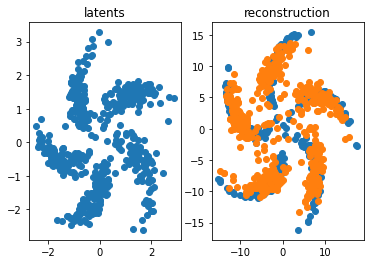

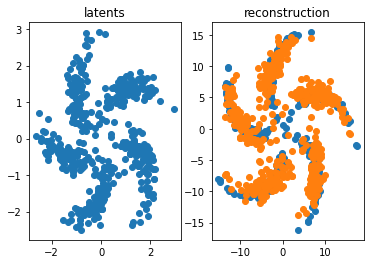

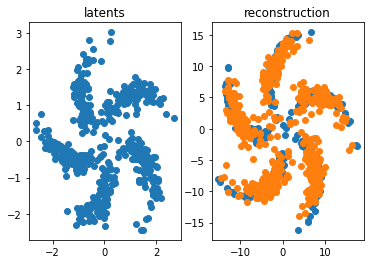

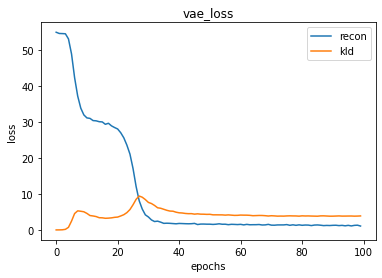

In [4]:
network = resVAE(**hyperparameters["VAE_parameters"])
train_loss = network.fit(
    data, **hyperparameters["VAE_train_parameters"]
)
plot_loss(train_loss, title="vae_loss")